<a href="https://colab.research.google.com/github/SammriddhGupta/Paletteinator/blob/main/Serious_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/wlifferth/ghw-2022-09

Cloning into 'ghw-2022-09'...
remote: Enumerating objects: 8390, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 8390 (delta 0), reused 16 (delta 0), pack-reused 8365
Receiving objects: 100% (8390/8390), 696.57 MiB | 53.01 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (14262/14262), done.


In [3]:
import os
import pandas as pd

print(os.listdir("ghw-2022-09"))

['artists.csv', 'art_files', 'README.md', 'art', '.git']


In [5]:
artists_df = pd.read_csv('ghw-2022-09/artists.csv')
artists_df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [6]:
artists_df.shape

(50, 8)

In [7]:
artists_df.sort_values(by=['paintings'])[['name', 'paintings']]

,name,paintings
49,Jackson Pollock,24
39,Eugene Delacroix,31
41,Georges Seurat,43
38,Paul Cezanne,47
48,Michelangelo,49
25,Caravaggio,55
34,Gustave Courbet,59
36,William Turner,66
37,Edvard Munch,67
40,Henri Rousseau,70


In [8]:
artists_top = artists_df[artists_df['paintings'] >= 300]

artists_top[['name', 'paintings']]

,name,paintings
8,Vincent van Gogh,877
13,Pablo Picasso,439
15,Pierre-Auguste Renoir,336
19,Albrecht Durer,328
30,Edgar Degas,702
46,Paul Gauguin,311


In [9]:
artists_top = artists_df[artists_df['paintings'] >= 300].reset_index()

artists_top[['name', 'paintings']]

,name,paintings
0,Vincent van Gogh,877
1,Pablo Picasso,439
2,Pierre-Auguste Renoir,336
3,Albrecht Durer,328
4,Edgar Degas,702
5,Paul Gauguin,311


In [14]:
images_dir = 'ghw-2022-09/art'
artists_dirs = os.listdir(images_dir)
clean_artist_names = artists_top['name'].str.replace(' ','_').values
clean_artist_names

array(['Vincent_van_Gogh', 'Pablo_Picasso', 'Pierre-Auguste_Renoir',
       'Albrecht_Durer', 'Edgar_Degas', 'Paul_Gauguin'], dtype=object)

In [15]:
images_dir = 'ghw-2022-09/art'
artists_dirs = os.listdir(images_dir)
clean_artist_names = artists_top['name'].str.replace(' ', '_').values

for clean_name in clean_artist_names:
  artist_dir = os.path.join(images_dir, clean_name)
  if os.path.exists(artist_dir):
    print(f"Found {artist_dir}")
  else:
    print(f"Didn't find {artist_dir}")

Found ghw-2022-09/art/Vincent_van_Gogh
Found ghw-2022-09/art/Pablo_Picasso
Found ghw-2022-09/art/Pierre-Auguste_Renoir
Found ghw-2022-09/art/Albrecht_Durer
Found ghw-2022-09/art/Edgar_Degas
Found ghw-2022-09/art/Paul_Gauguin


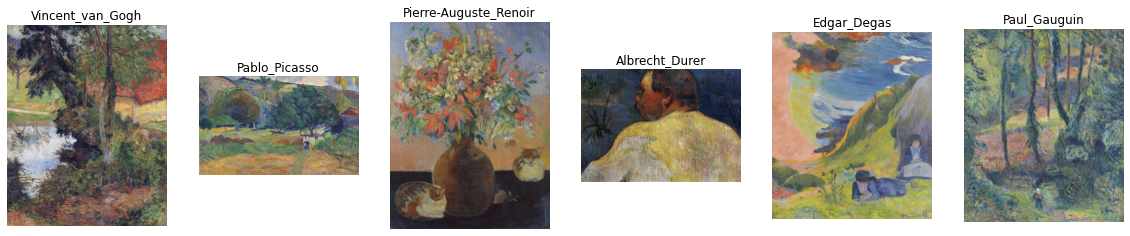

In [16]:
import matplotlib.pyplot as plt
import random

fig, axes = plt.subplots(1, len(clean_artist_names), figsize=(20, 5))

for i, artist in enumerate(clean_artist_names):
  artist_dir = os.path.join(images_dir, clean_name)
  art_filename = random.choice(os.listdir(artist_dir))
  image = plt.imread(os.path.join(artist_dir, art_filename))
  axes[i].imshow(image)
  axes[i].set_title(artist)
  axes[i].axis('off')


In [17]:
artists = ['Vincent_van_Gogh', 'Rembrandt', 'Andy_Warhol', 'Albrecht Durer', 'Titian']

In [18]:
images_dir = 'ghw-2022-09/art'
artists_dirs = os.listdir(images_dir)
clean_artist_names = [artist.replace(' ', '_') for artist in artists]

for clean_name in clean_artist_names:
  artist_dir = os.path.join(images_dir, clean_name)
  if os.path.exists(artist_dir):
    print(f"Found {artist_dir}")
  else:
    print(f"Didn't find {artist_dir}")


Found ghw-2022-09/art/Vincent_van_Gogh
Found ghw-2022-09/art/Rembrandt
Found ghw-2022-09/art/Andy_Warhol
Found ghw-2022-09/art/Albrecht_Durer
Found ghw-2022-09/art/Titian


Vincent_van_Gogh
Rembrandt
Andy_Warhol
Albrecht_Durer
Titian


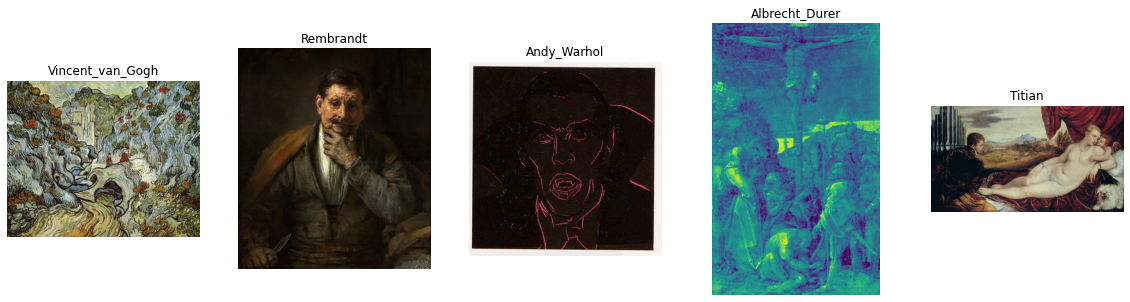

In [19]:
import matplotlib.pyplot as plt
import random

fig, axes = plt.subplots(1, len(clean_artist_names), figsize=(20, 5))

for i, artist in enumerate(clean_artist_names):
  print(artist)
  artist_dir = os.path.join(images_dir, artist)
  art_filename = random.choice(os.listdir(artist_dir))
  image = plt.imread(os.path.join(artist_dir, art_filename))
  axes[i].imshow(image)
  axes[i].set_title(artist)
  axes[i].axis('off')


In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [25]:
batch_size = 16
train_input_shape = (128, 128, 3)
n_classes = len(artists)

train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=5,
    zoom_range=0.01,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory=images_dir,
    class_mode='categorical',
    target_size=train_input_shape[0:2],
    batch_size=batch_size,
    subset='training',
    shuffle=True,
    classes=artists,
)

validation_generator = train_datagen.flow_from_directory(
    directory=images_dir,
    class_mode='categorical',
    target_size=train_input_shape[0:2],
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
    classes=artists,
)

step_size_train = train_generator.n // train_generator.batch_size
step_size_validation = validation_generator.n // validation_generator.batch_size
step_size_train, step_size_validation

Found 1261 images belonging to 5 classes.
Found 314 images belonging to 5 classes.


(78, 19)

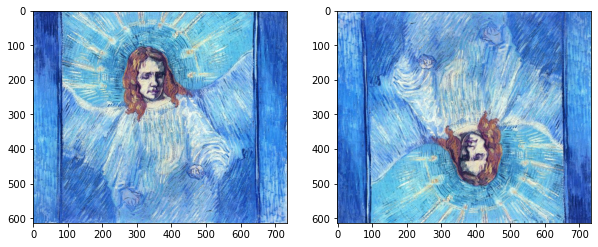

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

test_artist = 'Vincent_van_Gogh'

random_image_filename = random.choice(os.listdir(os.path.join(images_dir, test_artist)))
random_image_path = os.path.join(images_dir, test_artist, random_image_filename)

image = plt.imread(random_image_path)

axes[0].imshow(image)

transformed_image = train_datagen.random_transform(image)

axes[1].imshow(transformed_image)

In [27]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(3, 10, input_shape=train_input_shape))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(3, 5))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 3)       903       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 3)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 3)         228       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 3)        0         
 2D)                                                             
                                                                 
Total params: 1,131
Trainable params: 1,131
Non-trainable params: 0
_________________________________________________________________


In [28]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(3, 10, input_shape=train_input_shape))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(3, 5))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 119, 119, 3)       903       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 3)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 55, 55, 3)         228       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 3)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [29]:
optimizer = Adam(lr=0.0001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
def run_fit(epochs=1):
  history = model.fit_generator(
      generator=train_generator,
      steps_per_epoch=step_size_train,
      validation_data=validation_generator,
      validation_steps=step_size_validation,
      epochs=epochs,
      shuffle=True,
      verbose=1,
      use_multiprocessing=True,
      workers=16,
  )
  return history

SyntaxError: ignored

In [36]:
with tf.device('/cpu:0'):
  history = run_fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


78/78 [==============================] - 29s 352ms/step - loss: 49.6411 - accuracy: 0.5149 - val_loss: 34.4613 - val_accuracy: 0.5526


In [34]:
history.history.keys()

NameError: ignored

In [ ]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')